In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_titanic_train= pd.read_csv("train.csv")
original_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 评估和清理数据
在这一部分中，我们将对在上一部分建立的original_titanic_trainDataFrame所包含的数据进行评估和清理。

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准：数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

为了区分开经过清理的数据和原始的数据，我们创建新的变量cleaned_titanic_train，让它为original_titanic_train复制出的副本。我们之后的清理步骤都将被运用在cleaned_titanic_train上。

In [3]:
cleaned_titanic_train=original_titanic_train.copy()

### 数据整齐度

In [4]:
cleaned_titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度

接下来通过info，对数据内容进行大致了解。

In [5]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 处理缺失数据

从info方法的输出结果来看，在cleaned_titanic_train中，Age、Cabin和Embarked变量存在缺失值。

In [6]:
cleaned_titanic_train[cleaned_titanic_train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


有177条观察值的年龄变量缺失，占总体数据比例20%左右。由于这些观察值数量较多，且的其它变量仍然能为分析提供价值，我们最好保留这些行。

但由于我们后面需要用到的逻辑回归函数Logt不允许数据中包含缺失值，所以用乘客年龄平均值对缺失值进行填充。

In [7]:
average_age=cleaned_titanic_train['Age'].mean()
cleaned_titanic_train['Age']=cleaned_titanic_train['Age'].fillna(average_age)
cleaned_titanic_train['Age'].isna().sum()

np.int64(0)

In [8]:
cleaned_titanic_train[cleaned_titanic_train['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


有687条观察值的船舱号变量缺失，说明船舱号数据在大部分观察值中都是未知的，所以不能测除这些观察值。

此外，我们认为船舱号并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

In [9]:
cleaned_titanic_train[cleaned_titanic_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


仅有两条观察值的登船港口变量缺失，但我们认为登船港口并不是影响生还概率的关键因素，不会被纳入逻辆回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

### 处理重复数据

根据数据变量的含义以及内容来须、PassengerId是乘客的唯一标识符，不应该存在重复，因此查看是否存在重复值。

In [10]:
cleaned_titanic_train["PassengerId"].duplicated().sum()

np.int64(0)

输出结果为0，说明不存在重复值。

### 处理不一致数据

不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况。

In [11]:
cleaned_titanic_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
cleaned_titanic_train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [13]:
cleaned_titanic_train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
cleaned_titanic_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

从以上输出结果来看，均不存在不一致数据。

### 处理无效或错误数据

可以通过DataFrame的describe方法，对数值统计信息进行快速了解。

In [15]:
cleaned_titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


乘客年龄平均为30岁左右，最大值为80岁，最小值为0.42岁，同乘伴侣/同胞数量最大值为8个，最小为0个，同乘父母/孩子数量最大值为6个，最小值为
0个。船票价格平均为32元，最大值为512元，最小值为0元，猜测0元表示增票。数据不存在脱离现实的数值。

### 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，根据泰坦尼克号乘客的相关信息，预测沉船事件发生后的生还概率。

数据变量包含乘客同乘伴侣/同胞数量，以及同乘父母/孩子数量，这些可以帮助计算出船上家庭成员的数量。我们对同乘家庭成员数量是否会显著影响幸存感兴趣，因此可以创建一个新的变量，记录这一数值。

In [16]:
cleaned_titanic_train['FamilyNum']=cleaned_titanic_train['SibSp']+cleaned_titanic_train['Parch']
cleaned_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### 探索数据

在着手逻辑回归分析之前，我们可以先借助数据可视化，探索数值变量的分布，以及与乘客是否幸存存在相关性的变量，为后续的进一步分析提供方向。

In [17]:
#设置图表色盘为pastet"
sns.set_palette("pastel")

In [18]:
# 设置图标尺寸
plt.rcParams["figure.figsize"]=[7.00,3.50]
plt.rcParams["figure.autolayout"]=True

### 幸存比例

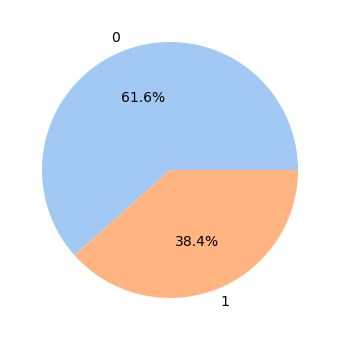

In [19]:
survived_count=cleaned_titanic_train['Survived'].value_counts()
survived_label=survived_count.index
plt.pie(survived_count,labels=survived_label,autopct='%.1f%%')
plt.show()

从以上饼图来看，泰坦尼克号遇难乘客多于幸存乘客，比例约为3:2。

### 乘客年龄

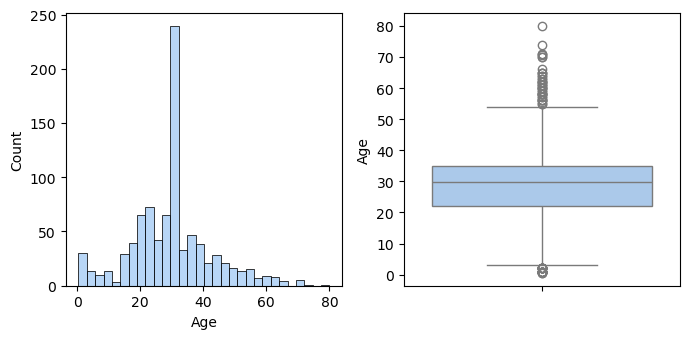

In [20]:
figure, axes = plt.subplots(1,2)
sns.histplot(cleaned_titanic_train,x='Age',ax=axes[0])
sns.boxplot(cleaned_titanic_train,y='Age',ax=axes[1])
plt.show()

### 乘客年龄与是否幸存

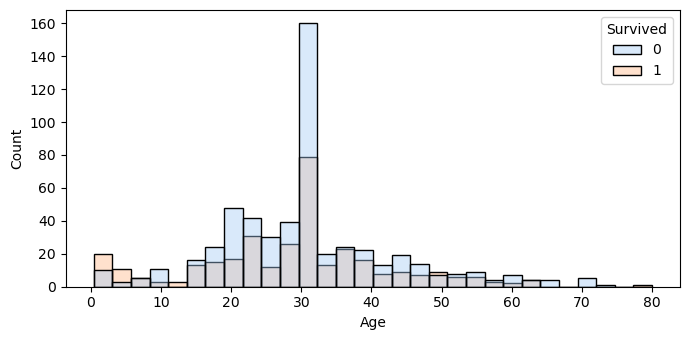

In [21]:
sns.histplot(cleaned_titanic_train,x='Age',hue='Survived',alpha=0.4)
plt.show()

从乘客年龄直方图来看，只有婴儿群体幸存比例较高，绝大部分其余年龄段都是遇难人数多于幸存人数。

### 船票金额分布

<Axes: ylabel='Fare'>

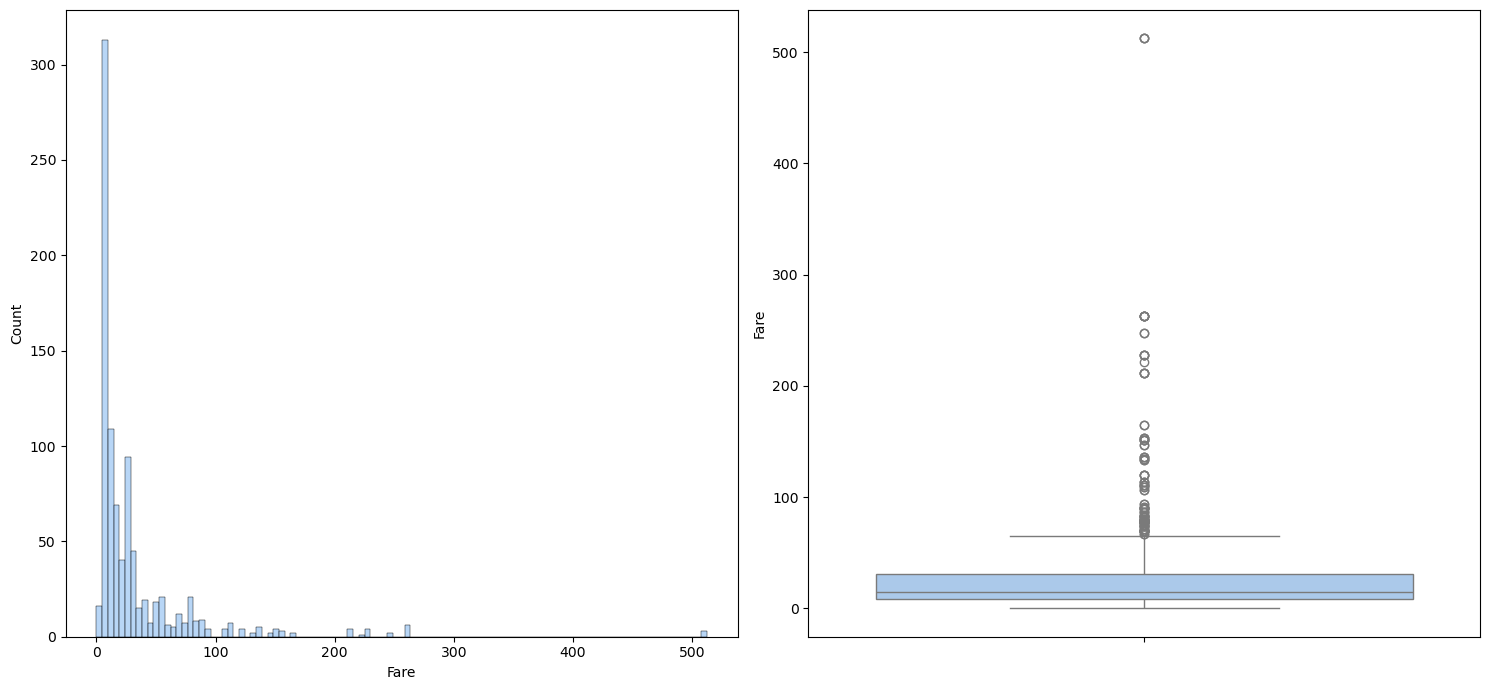

In [22]:
figure,axes=plt.subplots(1,2,figsize=[15,7])
sns.histplot(cleaned_titanic_train,x='Fare',ax=axes[0])
sns.boxplot(cleaned_titanic_train,y='Fare',ax=axes[1])

船票金额呈右偏态分布，说明数据集中的大多数船票价格中等，但有一些票价很高的极端值，使得均值被拉高。

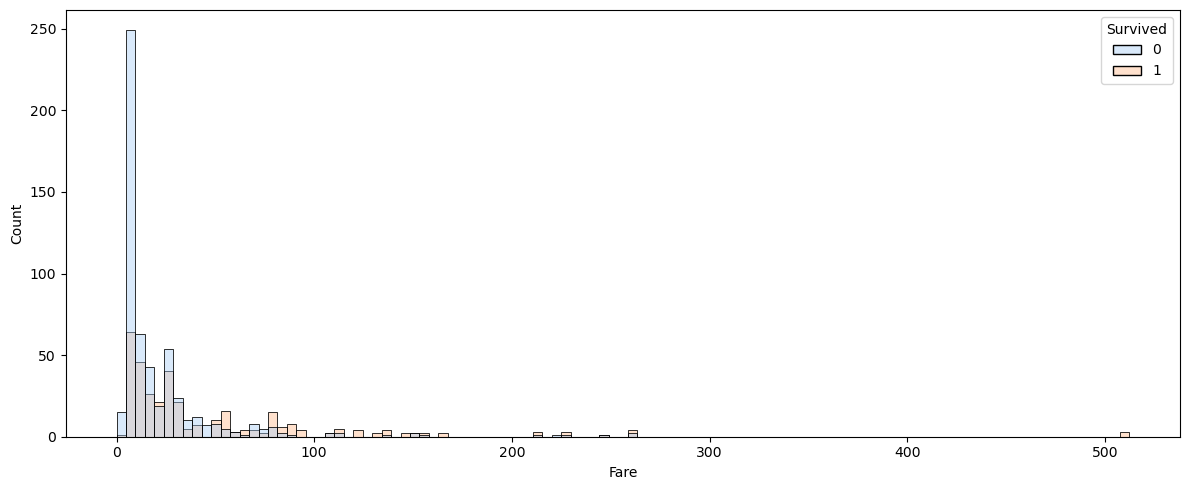

In [23]:
plt.subplots(1,1,figsize=[12,5])
sns.histplot(cleaned_titanic_train,x='Fare',hue='Survived', alpha=0.4)
plt.show()

### 船舱等级与是否幸存的关系

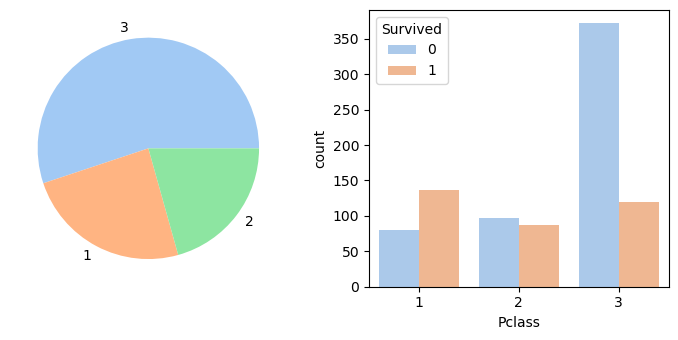

In [24]:
figure,axes=plt.subplots(1,2)
pclass_count=cleaned_titanic_train['Pclass'].value_counts()
pclass_label =pclass_count.index
axes[0].pie(pclass_count,labels=pclass_label)
sns.countplot(cleaned_titanic_train,x='Pclass',hue='Survived',ax=axes[1])
plt.show()

从是否幸存与船舱等级之间的柱状图来看，船舱等级低的乘客中遇难比例更大，船舱等级高的乘客中幸存比例更大

### 性别与是否幸存的关系

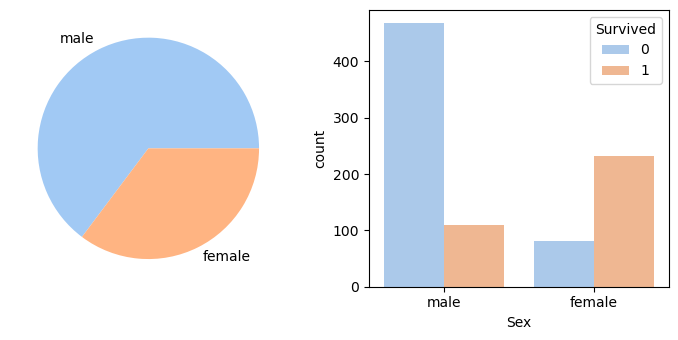

In [25]:
figure,axes=plt.subplots(1,2)
pclass_count=cleaned_titanic_train['Sex'].value_counts()
pclass_label =pclass_count.index
axes[0].pie(pclass_count,labels=pclass_label)
sns.countplot(cleaned_titanic_train,x='Sex',hue='Survived',ax=axes[1])
plt.show()

### 登船港口与是否幸存的关系

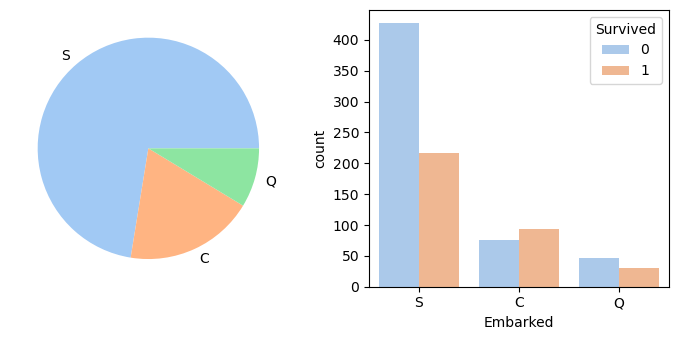

In [26]:
figure,axes=plt.subplots(1,2)
pclass_count=cleaned_titanic_train['Embarked'].value_counts()
pclass_label =pclass_count.index
axes[0].pie(pclass_count,labels=pclass_label)
sns.countplot(cleaned_titanic_train,x='Embarked',hue='Survived',ax=axes[1])
plt.show()

### 家庭成员数量与是否幸存的关系

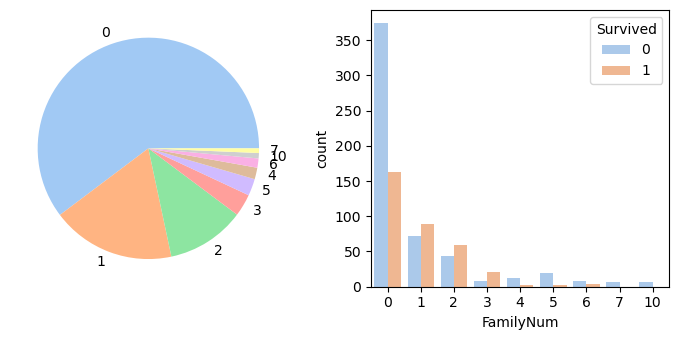

In [27]:
figure,axes=plt.subplots(1,2)
pclass_count=cleaned_titanic_train['FamilyNum'].value_counts()
pclass_label =pclass_count.index
axes[0].pie(pclass_count,labels=pclass_label)
sns.countplot(cleaned_titanic_train,x='FamilyNum',hue='Survived',ax=axes[1])
plt.show()

从是否幸存与乘客家庭成员之间的柱状图来看，独身的乘客中遇难的多于幸存的。从有携带家庭成员的乘客来看，家庭成员在1~3位之间的幸存人数超过遇难人数，但同乘家庭成员超过3位后，遇难的更多。

### 分析数据

在分析步骤中，我们将利用以上清理后到的数据，进行逻辑回归分析，目标是得到一个可以根据泰坦尼克号乘客各个属性，对沉船事件后幸存情况进行预
测的数学模型。
我们先引入做逻辑回归所需的模块。

In [28]:
import statsmodels.api as sm

然后可以创建一个新的DataFramelr_titanic_train，让它作为我们进逻辑性回归分析所用的数据。

和cleaned_titanic_train区分开的原因是，我们在进行回归分析前，还可能需要对数据进行一些准备，比如引l入虚拟变量，这些都可以在
lr_titanic_train上执行。

In [29]:
lr_titanic_train=cleaned_titanic_train.copy()
lr_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


移除大概率不会影响乘客幸存概率的变量。

In [30]:
lr_titanic_train=lr_titanic_train.drop(['PassengerId','Name', 'Ticket','Cabin','Embarked'],axis=1)
lr_titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilyNum
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


数据里还存在分类变量，无法直接建立逻辑回归模型。我们需要引入虚拟变量，也就是用0和1分别表示是否属于该类别。

In [31]:
lr_titanic_train=pd.get_dummies(lr_titanic_train,drop_first=True,columns=['Pclass','Sex'],dtype=int)
lr_titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,0,22.0,1,0,7.2500,1,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,1


接下来，我们要把因变量和自变量划分出来。
因变量是Survived变量，因为我们进行逻辑回归的目的，是根据其它可能对乘客生还概率有影响的变量，来预测幸存情况。

In [32]:
y=lr_titanic_train['Survived']

我们可以把除Survived之外的先纳入自变量，但需要查看它们之间的相关性。如果其中有些变量之间相关性很高，会导致共线性

In [33]:
X= lr_titanic_train.drop(['Survived'],axis=1)
X.corr()

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,1.000000,-0.232625,-0.179191,0.091566,-0.248512,0.006589,-0.281004,0.084153
SibSp,-0.232625,1.000000,0.414838,0.159651,0.890712,-0.055932,0.092548,-0.114631
Parch,-0.179191,0.414838,1.000000,0.216225,0.783111,-0.000734,0.015790,-0.245489
Fare,0.091566,0.159651,0.216225,1.000000,0.217138,-0.118557,-0.413333,-0.182333
FamilyNum,-0.248512,0.890712,0.783111,0.217138,1.000000,-0.038594,0.071142,-0.200988
Pclass_2,0.006589,-0.055932,-0.000734,-0.118557,-0.038594,1.000000,-0.565210,-0.064746
Pclass_3,-0.281004,0.092548,0.015790,-0.413333,0.071142,-0.565210,1.000000,0.137143
Sex_male,0.084153,-0.114631,-0.245489,-0.182333,-0.200988,-0.064746,0.137143,1.000000


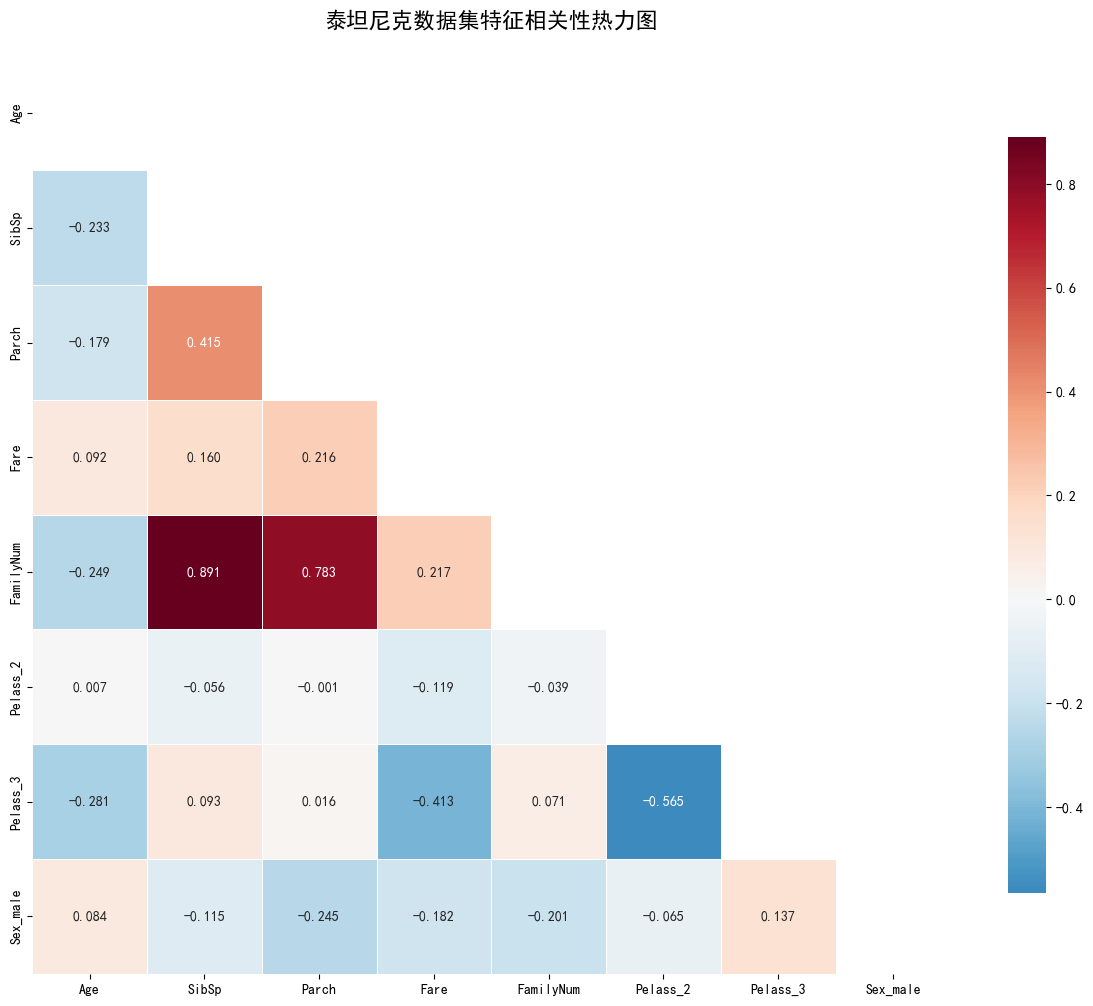

In [34]:
# 根据你提供的相关性数据创建DataFrame
correlation_data = {
    'Age': [1.000000, -0.232625, -0.179191, 0.091566, -0.248512, 0.006589, -0.281004, 0.084153],
    'SibSp': [-0.232625, 1.000000, 0.414838, 0.159651, 0.890712, -0.055932, 0.092548, -0.114631],
    'Parch': [-0.179191, 0.414838, 1.000000, 0.216225, 0.783111, -0.000734, 0.015790, -0.245489],
    'Fare': [0.091566, 0.159651, 0.216225, 1.000000, 0.217138, -0.118557, -0.413333, -0.182333],
    'FamilyNum': [-0.248512, 0.890712, 0.783111, 0.217138, 1.000000, -0.038594, 0.071142, -0.200988],
    'Pelass_2': [0.006589, -0.055932, -0.000734, -0.118557, -0.038594, 1.000000, -0.565210, -0.064746],
    'Pelass_3': [-0.281004, 0.092548, 0.015790, -0.413333, 0.071142, -0.565210, 1.000000, 0.137143],
    'Sex_male': [0.084153, -0.114631, -0.245489, -0.182333, -0.200988, -0.064746, 0.137143, 1.000000]
}

# 创建DataFrame
corr_df = pd.DataFrame(correlation_data, index=correlation_data.keys())

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建热力图
plt.figure(figsize=(12, 10))

# 使用seaborn绘制热力图
mask = np.triu(np.ones_like(corr_df, dtype=bool))  # 创建上三角掩码，避免重复显示
heatmap = sns.heatmap(corr_df, 
                      mask=mask,
                      annot=True, 
                      fmt=".3f", 
                      cmap='RdBu_r', 
                      center=0,
                      square=True,
                      linewidths=0.5,
                      cbar_kws={"shrink": 0.8})

plt.title('泰坦尼克数据集特征相关性热力图', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

一般我们认为，当相关系数的绝对值大于0.8的时候，可能导致严重共线性，所以我们检查的时候，找绝对值大于0.8的值即可。

In [35]:
X.corr().abs()>0.8

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False
Parch,False,False,True,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False
FamilyNum,False,True,False,False,True,False,False,False
Pclass_2,False,False,False,False,False,True,False,False
Pclass_3,False,False,False,False,False,False,True,False
Sex_male,False,False,False,False,False,False,False,True


从以上输出来看，SibSp和FamilyNum之间的相关系数绝对值大于0.8。这符合预期，因为FamilyNum是根据SibSp和Parch计算出来的。

不同变量之间的如果相关性过高，会导致数值优化算法无法收敛，无法获得逻辑回归模型参数的计算结果，因此我们需要移除FamilyNum或SibSp。

我们对同乘家庭成员是否会影响幸存概率感兴趣，所以保留FamilyNum。

此外，如果仔细看相关系数数值，会发现Parch和FamilyNum之间也存在强相关，相关系数为0.78，接近0.8，因此我们也对Parch进行移除，避免算法无法收敛。

In [36]:
X=X.drop(['Parch','SibSp'],axis=1)

接下来，给模型的线性方程添加截距。

In [37]:
X=sm.add_constant(X)

下一步就可以调用Logit函数，利用最大似然优化来得到逻辑回归模型的参数值，并输出总结信息。

当我们把显著区间设定为0.05时，以上结果的P值可以看出，模型认为船票价格对乘客幸存概率没有显著性影响。因此可以把这个变量移除后，再次建立逻辑回归模型。

In [38]:
X=X.drop(['Fare'],axis=1)
model=sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Mon, 13 Oct 2025   Pseudo R-squ.:                  0.3323
Time:                        15:14:26   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

逻辑回归模型预测以下因素的增加（或存在）会降低幸存概率：年龄、同乘家庭成员数、不在一等舱、性别为男性。

要理解各个各个自变量系数的实际含义，我们需要计算自然常数的次方。

In [39]:
# Age
np.exp(-0.0395)

np.float64(0.9612699539905982)

以上结果说明，年龄每大一岁，生还概率降低4%左右。

In [40]:
#FamilyNum
np.exp(-0.2186)

np.float64(0.803643111115195)

以上结果说明，每多一名同乘家庭成员，生还概率降低20%左右。

In [41]:
# Pclass_2
np.exp(-1.1798)

np.float64(0.30734020049483596)

以上结果说明，二等舱乘客的生还概率比一等舱乘客低71%左右。

In [44]:
# Pclass_3
np.exp(-2.3458)

np.float64(0.09577055503172162)

以上结果说明，三等舱乘客的生还概率比一等舱乘客低90%左右。

In [45]:
# Sex_male
np.exp(-2.7854)

np.float64(0.061704402333015156)

以上结果说明，男性乘客的生还概率比女性乘客低94%左右。

根据模型参数值，我们总结：
- 年龄小的乘客幸存概率更高：
- 女性乘客的生还率比男性乘客的幸存概率更高；
- 来自的船舱等级高的乘客幸存概率更高；
- 同乘家庭成员少的乘客幸存概率更高。

前两条背后的原因可能与泰坦尼克号沉船后逃生时，“让孩子和女性先走”的原则。第三条说明可能当时舱位更尊贵的乘客拥有了优先逃生的机会。第四条可能是因为拥有较大数量家庭成员的乘客在灾难发生时会急于解救其他家庭成员而非选择逃生，最后也失去了自己逃生的机会。

得到模型后，我们将用于预测titianic_test.csv里泰坦尼克号乘客的生还情况。

首先读取titianic_test.csv的数据。

In [48]:
titanic_test=pd.read_csv("test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


从以上输出可见，Age、Fare、Cabin存在缺失值。其中Fare和Cabin不属于回归模型的自变量，即使缺失也不会影响预测，因此可以忽略

Age需要我们进行和针对cleaned_titanic_train同样的操作，即用平均值填充。

In [53]:
titanic_test['Age']=titanic_test['Age'].fillna(titanic_test['Age'].mean())
titanic_test['Age'].isna().sum()

np.int64(0)

下一步是给模型中的分类变量引入虚拟变量，但在引入前我们需要先把分类变量的类型转换为Category，并且通过categories参数，让程序知道所有可能的分类值。

这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。

In [57]:
titanic_test['Pclass']=pd.Categorical(titanic_test['Pclass'],categories=['1','2','3'])
titanic_test['Sex']=pd.Categorical(titanic_test['Sex'],categories=['female','male'])
titanic_test['Embarked']=pd.Categorical(titanic_test['Sex'],categories=['C','O','S'])

下一步，对分类变量引入虚拟变量。

In [58]:
titanic_test=pd.get_dummies(titanic_test,drop_first=True,columns=['Pclass','Sex'],dtype=int)
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,NaN,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,NaN,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,NaN,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,NaN,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,NaN,0,0,0


查看一下模型需要的输入变量

In [59]:
model.params

const        4.061982
Age         -0.039495
FamilyNum   -0.218627
Pclass_2    -1.179763
Pclass_3    -2.345823
Sex_male    -2.785398
dtype: float64

由于我们在数据整理步骤建立了FamilyNum变量，此处也需要对预测数据加上此变量。

In [62]:
titanic_test['FamilyNum']=titanic_test['SibSp']+ titanic_test['Parch']
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male,FamilyNum
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,NaN,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,NaN,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,NaN,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,NaN,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,NaN,0,0,0,2


接下来构建我们要输入给模型进行预测的变量，需要和模型训练时的输入一致。

In [64]:
X_test =titanic_test[['Age','FamilyNum','Pclass_2','Pclass_3','Sex_male']]
X_test = sm.add_constant(X_test)

现在就可以调用逻辑回归模型的predict方法，获得预测的幸存概率。

In [65]:
predicted_value =model.predict(X_test)
predicted_value

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

In [67]:
predicted_value >0.5

0      False
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415    False
416     True
417    False
Length: 418, dtype: bool